In [1]:
def calc_avg_clients_metrics(clients_metrics):
    avg_acc = 0
    avg_prec = 0
    avg_rec = 0
    avg_fscore = 0
    avg_loss = 0

    for client_metrics in clients_metrics:
        avg_acc += client_metrics["accuracy"]
        avg_prec += client_metrics["precision"]
        avg_rec += client_metrics["recall"]
        avg_fscore += client_metrics["f1"]
        avg_loss += client_metrics["loss"]
    
    nr_clients = len(clients_metrics)
    avg_acc /= nr_clients
    avg_prec /= nr_clients
    avg_rec /= nr_clients
    avg_fscore /= nr_clients
    avg_loss /= nr_clients

    return {
        'average_accuracy': avg_acc,
        'average_precision': avg_prec,
        'average_recall': avg_rec,
        'average_fscore': avg_fscore,
        'average_loss': avg_loss,
    }

# Plot dataset

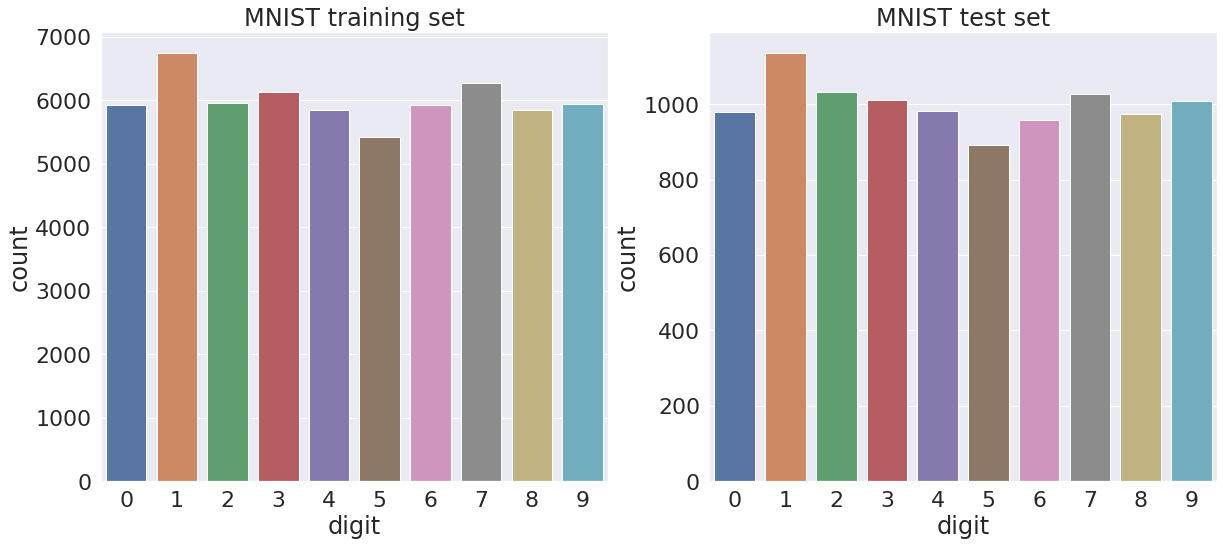

In [5]:
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.set(rc={'figure.figsize':(20,8.27)})
sns.set(font_scale=2)  # crazy big

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

dataset = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)

fig, ax = plt.subplots(1,2)

nmbrs_count = {'digit': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'count': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
for nmbr in dataset.targets.numpy():
    nmbrs_count['count'][nmbr] += 1
df_train = pd.DataFrame(nmbrs_count)
sns.barplot(x='digit', y="count", data=df_train, ax=ax[0]).set_title('MNIST training set')
plt.legend([],[], frameon=False)

dataset = datasets.MNIST('../data', train=False, download=True,
                       transform=transform)

nmbrs_count = {'digit': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'count': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
for nmbr in dataset.targets.numpy():
    nmbrs_count['count'][nmbr] += 1
df_test = pd.DataFrame(nmbrs_count)
sns.barplot(x='digit', y="count", data=df_test, ax=ax[1]).set_title('MNIST test set')

fig.savefig("res.png")


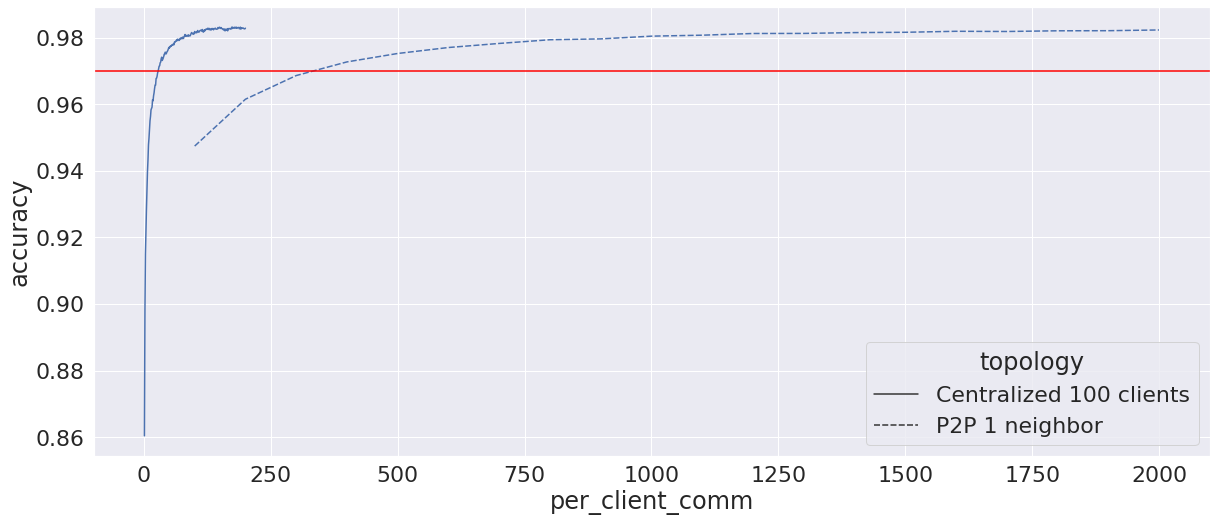

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
#sns.set_theme(style="darkgrid")

### OPEN P2P
nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
C = 10  ### number of clients in each round, [1, nr_clients]
client_epochs = 1   # Number of client epochs
communication_rounds = 200  # Number of maximum communication rounds
test_every_x_round = 10

dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
path = './Results/P2P/' + dir_str

with open(path + 'metrics', 'rb') as metrics_file:
    metrics_p2p = pickle.load(metrics_file)

# per node communication
# C*nr_clients*round
# 

avgs =  [calc_avg_clients_metrics(metrics_p2p[0][i]) for i in range(communication_rounds//test_every_x_round)]
df_p2p = pd.DataFrame(avgs)
comm_round = [i-1 for i in range(10,210,10)]
per_client_comm = [C*i for i in range(10, 210, 10)]

# 0 indexed
df_p2p['comm_round'] = comm_round
df_p2p['per_client_comm'] = per_client_comm
# change columns to match centralized
df_p2p.columns = ['accuracy', 'precision', 'recall', 'f1','loss', 'comm_round', 'per_client_comm']

### OPEN CENTRALIZED
nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
C = 100  ### number of clients in each round, [1, nr_clients]
client_epochs = 1   ### Number of client epochs
communication_rounds = 200  ### Number of maximum communication rounds
test_every_x_round = 1

dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
path = './Results/Fedavg/' + dir_str

with open(path + 'metrics', 'rb') as metrics_file:
    metrics = pickle.load(metrics_file)

df = pd.DataFrame.from_dict(metrics[0])
df.drop(columns=["classification_report"])
df["comm_round"] = [i for i in range(200)]
df['per_client_comm'] = [i+1 for i in range(200)]

### OPEN CENTRALIZED
nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
C = 100  ### number of clients in each round, [1, nr_clients]
client_epochs = 1   # Number of client epochs
communication_rounds = 200  # Number of maximum communication rounds
test_every_x_round = 1

dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
path = './Results/Fedavg/' + dir_str

with open(path + 'metrics', 'rb') as metrics_file:
    metrics = pickle.load(metrics_file)

df = pd.DataFrame.from_dict(metrics[0])
df.drop(columns=["classification_report"])
df["comm_round"] = [i for i in range(200)]
df['per_client_comm'] = [i+1 for i in range(200)]

concatenated = pd.concat([df.assign(topology="Centralized 100 clients"), df_p2p.assign(topology="P2P 1 neighbor")])
graph = sns.lineplot(x="per_client_comm", y="accuracy", style="topology", data=concatenated)
graph.axhline(0.97, color='red')


In [ ]:
df_p2p

,accuracy,precision,recall,f1,loss,comm_round
0,0.925776,0.926806,0.924980,0.924835,0.244182,9
1,0.944457,0.944995,0.943975,0.943911,0.188151,19
2,0.954137,0.954386,0.953697,0.953706,0.158430,29
3,0.959086,0.959380,0.958736,0.958747,0.144474,39
4,0.963272,0.963550,0.962898,0.962980,0.133194,49
5,0.966650,0.966851,0.966327,0.966405,0.123041,59
6,0.967980,0.968134,0.967709,0.967748,0.118513,69
7,0.969352,0.969406,0.969107,0.969111,0.115523,79
8,0.970376,0.970509,0.970129,0.970172,0.113610,89
9,0.972545,0.972648,0.972301,0.972359,0.105538,99


Text(0.5, 1.0, 'Experiment results')

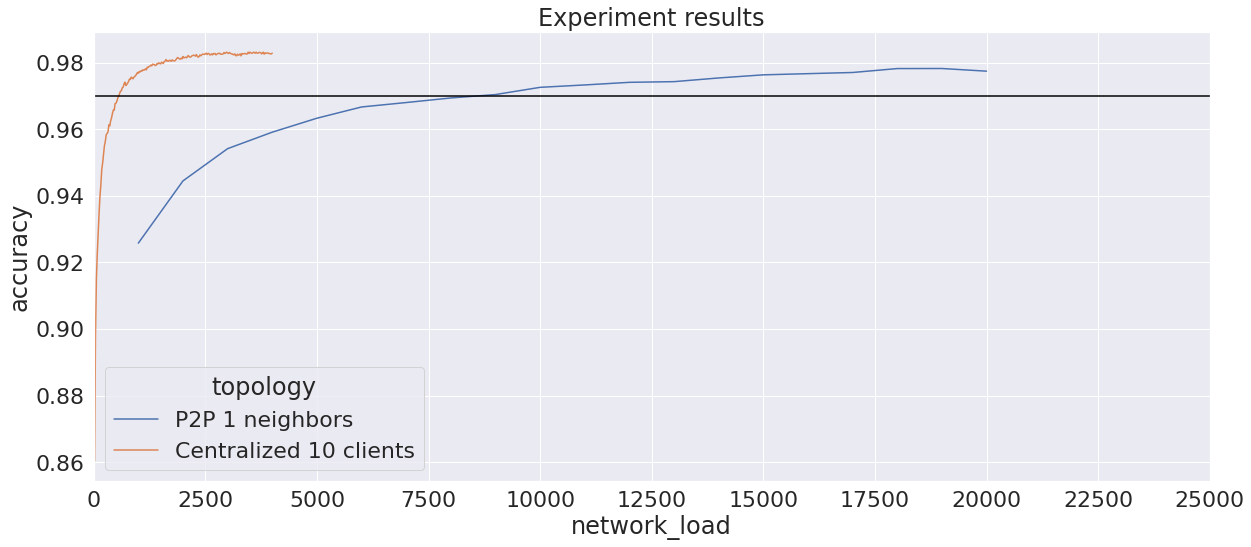

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.ticker as ticker
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set(font_scale=2)  # crazy big

### OPEN P2P
C_all=[1,]# 2, 5, 10, 20, 50]
dfs = []
for C in C_all:
    nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
    client_epochs = 1   # Number of client epochs
    communication_rounds = 200  # Number of maximum communication rounds
    test_every_x_round = 10

    dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
    path = './Results/P2P/' + dir_str

    with open(path + 'metrics', 'rb') as metrics_file:
        metrics_p2p = pickle.load(metrics_file)

    # per node communication
    # C*nr_clients*round

    avgs =  [calc_avg_clients_metrics(metrics_p2p[0][i]) for i in range(communication_rounds//test_every_x_round)]
    df_p2p = pd.DataFrame(avgs)
    comm_round = [i-1 for i in range(10,210,10)]
    sent_models_per_client = [C*i for i in range(10, 210, 10)]
    # neighbors * communication_round/epoch

    # 0 indexed
    df_p2p['comm_round'] = comm_round
    df_p2p['sent_models_per_client'] = sent_models_per_client
    df_p2p['network_load'] = [i*nr_clients*C for i in range(10, 210, 10)]
    # change columns to match centralized
    df_p2p.columns = ['accuracy', 'precision', 'recall', 'f1','loss', 'comm_round', 'sent_models_per_client', 'network_load']
    dfs.append(df_p2p.assign(topology="P2P {} neighbors".format(C)))

### OPEN CENTRALIZED
nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
C = 100  ### number of clients in each round, [1, nr_clients]
client_epochs = 1   # Number of client epochs
communication_rounds = 200  # Number of maximum communication rounds
test_every_x_round = 1

dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
path = './Results/Fedavg_colab/' + dir_str

with open(path + 'metrics', 'rb') as metrics_file:
    metrics = pickle.load(metrics_file)

df = pd.DataFrame.from_dict(metrics[0])
df.drop(columns=["classification_report"])
df["comm_round"] = [i for i in range(200)]
df['sent_models_per_client'] = [i+1 for i in range(200)]
df['network_load'] = [(i+1)*20 for i in range(200)]

dfs.append(df.assign(topology='Centralized 10 clients'))

concatenated = pd.concat(dfs)
graph = sns.lineplot(x="network_load", y="accuracy", hue="topology", data=concatenated)
graph.axhline(0.97, color='black')
plt.xlim(0, 25000)
graph.xaxis.set_major_locator(ticker.MultipleLocator(2500))
graph.set_title('Experiment results')
#graph.xaxis.set_major_formatter(ticker.ScalarFormatter())


{'neighbors': [1, 2, 5], 'sent_models_per_client': [90, 120, 200]}


Text(0.5, 1.0, 'Reached average 97% accuracy P2P models')

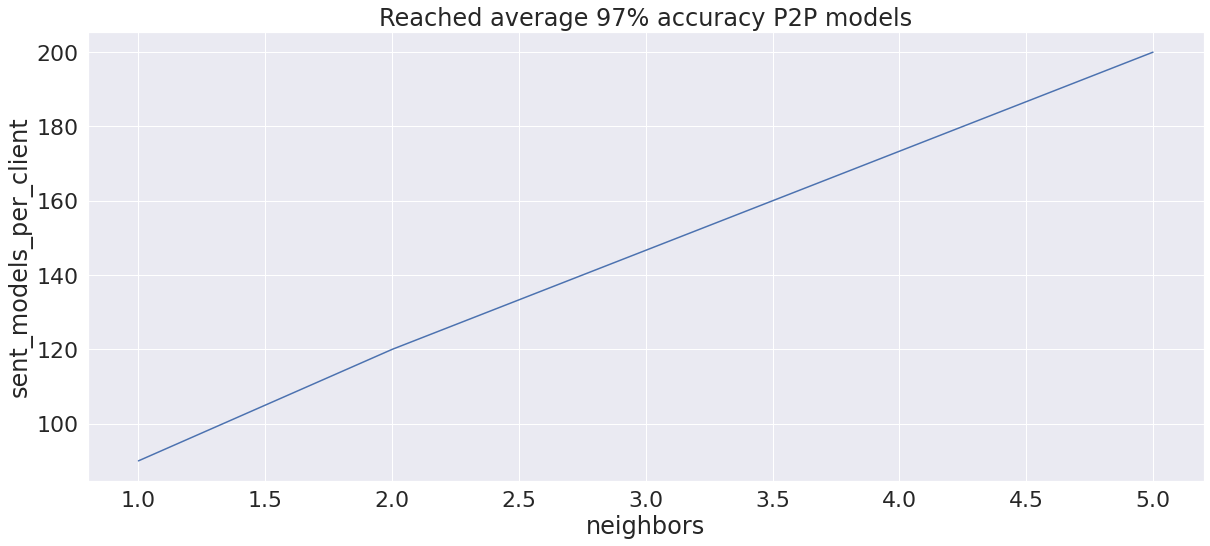

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
#sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set(font_scale=2)  # *crazy big

### OPEN P2P
C_all=[1, 2, 5,]# 10, 20, 50]
dfs = []

# Key: C
# Value: per client communication
# when reached 97%
reach_threshhold = {'neighbors': [], 'sent_models_per_client': []}
for C in C_all:
    nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
    client_epochs = 1   # Number of client epochs
    communication_rounds = 200  # Number of maximum communication rounds
    test_every_x_round = 10

    dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
    path = './Results/P2P/' + dir_str

    with open(path + 'metrics', 'rb') as metrics_file:
        metrics_p2p = pickle.load(metrics_file)

    # per node communication
    # C*nr_clients*round

    avgs =  [calc_avg_clients_metrics(metrics_p2p[0][i]) for i in range(communication_rounds//test_every_x_round)]

    # Find when acc bigger than 97%
    for i, test_round in enumerate(avgs):
        if test_round['average_accuracy'] >= 0.97:
            reach_threshhold['neighbors'].append(C)
            reach_threshhold['sent_models_per_client'].append((i+1)*test_every_x_round*C)
            break

print(reach_threshhold)
df = pd.DataFrame(reach_threshhold)
graph = sns.lineplot(x="neighbors", y="sent_models_per_client", data=df)
graph.set_title("Reached average 97% accuracy P2P models")

In [ ]:
# systemtid MB, sekunder x axel, neighbors y axel, 
# tid y axel, tid att träna x axel, heatmap X.
# probability interval
# credible interval

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.ticker as ticker
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set(font_scale=2)  # crazy big

### OPEN P2P
C_all=[10, 20, 50, 100]
dfs = []
for C in C_all:
    nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
    client_epochs = 1   # Number of client epochs
    communication_rounds = 1000  # Number of maximum communication rounds
    test_every_x_round = 1

    dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
    path = './Results/Fedavg_non_iid/' + dir_str

    with open(path + 'metrics', 'rb') as metrics_file:
        metrics_p2p = pickle.load(metrics_file)

    # per node communication
    # C*nr_clients*round

    with open(path + 'metrics', 'rb') as metrics_file:
    metrics = pickle.load(metrics_file)

    df = pd.DataFrame.from_dict(metrics[0])
    df.drop(columns=["classification_report"])
    df["comm_round"] = [i for i in range(communication_rounds)]
    df['sent_models_per_client'] = [i+1 for i in range(communication_rounds)]
    df['network_load'] = [(i+1)*(C*2) for i in range(200)]

    dfs.append(df.assign(topology="Centralized non-IID {} clients".format(C))

### OPEN CENTRALIZED
nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
C = 100  ### number of clients in each round, [1, nr_clients]
client_epochs = 1   # Number of client epochs
communication_rounds = 200  # Number of maximum communication rounds
test_every_x_round = 1

dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
path = './Results/Fedavg_colab/' + dir_str

with open(path + 'metrics', 'rb') as metrics_file:
    metrics = pickle.load(metrics_file)

df = pd.DataFrame.from_dict(metrics[0])
df.drop(columns=["classification_report"])
df["comm_round"] = [i for i in range(200)]
df['sent_models_per_client'] = [i+1 for i in range(200)]
df['network_load'] = [(i+1)*20 for i in range(200)]

dfs.append(df.assign(topology='Centralized 10 clients'))

concatenated = pd.concat(dfs)
graph = sns.lineplot(x="network_load", y="accuracy", hue="topology", data=concatenated)
graph.axhline(0.97, color='black')
plt.xlim(0, 25000)
graph.xaxis.set_major_locator(ticker.MultipleLocator(2500))
graph.set_title('Experiment results')
#graph.xaxis.set_major_formatter(ticker.ScalarFormatter())